# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
#reshape
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # devide on the max value
x_test /= 255
#convert label to categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)




In [4]:
x_train.shape , x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
y_train.shape , y_test.shape

((60000, 10), (10000, 10))

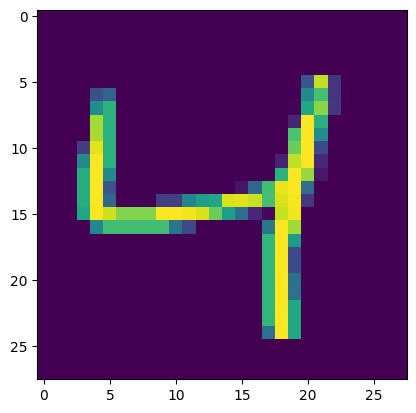

In [6]:
plt.imshow(X_train[2]) # show sample image

In [7]:
y_train[2] # show the corresponding label

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be careful while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [8]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4300 - accuracy: 0.9138 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 2/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0827 - accuracy: 0.9750 - val_loss: 0.0761 - val_accuracy: 0.9758
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0750 - val_accuracy: 0.9790
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0688 - val_accuracy: 0.9805
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0586 - val_accuracy: 0.9830
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0692 - val_accuracy: 0.9834
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0704 - val_

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9823
Test Accuracy: 0.9822999835014343


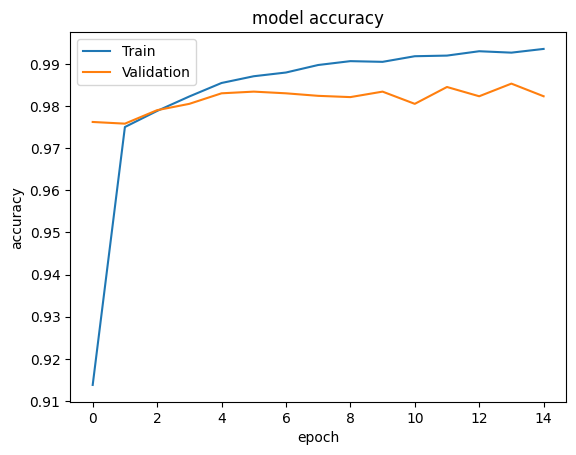

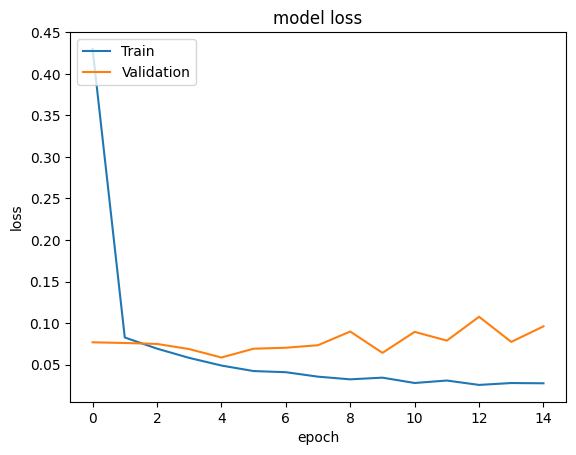

In [10]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
